In [20]:
import pandas as pd
from nltk.corpus import wordnet

In [21]:
#This method will calculate the similarity score for us
def get_jaccard_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1.union(S2))
#This method will calculate the similarity score for us
def get_dice_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return 2 * ( len(S1.intersection(S2)) / (len(S1) + len(S2)))
#This method will calculate the similarity score for us
def get_overlap_similarity(S1,S2):
    if len(S1) == 0 or len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / min((len(S1) , len(S2)))
#This method will calculate the similarity score for us
def get_containment_similarity(S1,S2):
    if len(S1) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1)

In [22]:
def get_augmented_wordnet_set_different_length(word):
    list_output = get_augmented_wordnet_list(word)
    return  [set  (list_output[:1]), set (list_output[:2]),
             set ( list_output[:3]) , set ( list_output[:4]) ,
             set ( list_output[:5]) , set ( list_output) ]


def get_augmented_wordnet_list(word):
    word = word.lower()
    list_of_word = []
    for synset in wordnet.synsets(word):
    #     print('----' , synset.name())
        for lemma in synset.lemmas():
            list_of_word.append(lemma.name())
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return list_of_word

In [23]:
eng_word1_aug = get_augmented_wordnet_set_different_length("English")
eng_word1_aug

[{'english_language'},
 {'english_language', 'english_people'},
 {'english_language', 'english_people', 'side'},
 {'english_language', 'english_people', 'side'},
 {'english_language', 'english_people', 'side'},
 {'english_language', 'english_people', 'side'}]

In [24]:
def get_augmented_wordnet_set(word):
    word = word.lower()
    list_of_word = []
    for synset in wordnet.synsets(word):
    #     print('----' , synset.name())
        for lemma in synset.lemmas():
            list_of_word.append(lemma.name())
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return set(list_of_word)

In [25]:
given_data = pd.read_excel('Cross Lingual dataset.xlsx')
given_data.shape

(1000, 4)

In [26]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation
0,Joule,خلائی جہاز,0.58,spacecraft
1,Promised Land,باکو,0.42,Baku
2,car,سائیکل,2.83,bicycle
3,polyhedron,اداکار,0.00,actor
4,multiple sclerosis,ایم ایس,3.92,MS


In [27]:
for i in range(1 , 7):
#     print("English Word 1 AL" + i)
    given_data[ "English Word 1 AL"+str(i) ] = ''
    given_data[ "English Word 2 AL"+str(i) ] = ''
    given_data['Jaccard A'+str(i)] = ''
    given_data['Dice A'+str(i)] = ''
    given_data['Overlap A'+str(i)] = ''
    given_data['Containment A'+str(i)] = ''
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,,,,,,,...,,,,,,,,,,
1,Promised Land,باکو,0.42,Baku,,,,,,,...,,,,,,,,,,
2,car,سائیکل,2.83,bicycle,,,,,,,...,,,,,,,,,,
3,polyhedron,اداکار,0.00,actor,,,,,,,...,,,,,,,,,,
4,multiple sclerosis,ایم ایس,3.92,MS,,,,,,,...,,,,,,,,,,


In [28]:
for index, row in given_data.iterrows():
    print (index ,row["Word 1"], row["Word 2 Translation"] )

0 Joule spacecraft
1 Promised Land Baku
2 car bicycle
3 polyhedron actor
4 multiple sclerosis MS
5 fault system
6 weapon helmet
7 screenwriter television
8 United Nations Ban Ki-moon
9 Si-o-seh pol Mathematical Bridge
10 basilica mosaic
11 watercolor painting brush
12 democracy monarchy
13 Gauss scientist
14 tuberculosis LED
15 self-driving car autonomous car
16 apocalypse fire
17 speed post
18 PlayStation Wii
19 laptop notebook
20 Harry Potter wizard
21 snowboard skiing
22 pointer slide
23 sensor radiator
24 hit frame
25 theory hypothesis
26 Wall Street financial market
27 Darwin evolution
28 actor actress
29 film theatre
30 national anthem patriotism
31 screen monitor
32 dairy honey
33 Mount Everest Chomolungma
34 tug of war Snakes and Ladders
35 pesticide pest
36 policeman politician
37 neuropsychology parapsychology
38 battery energy
39 Legion of Honour stationery
40 Spider-Man street
41 peninsula island
42 equator Ecuador
43 chart graph
44 simulation robotics
45 Nike Adidas
46 soc

469 nature flora
470 subroutine compiler
471 Hamadan Rome
472 umbrella heater
473 honor esteem
474 insignia dignity
475 KFC McDonald's
476 joystick radar
477 basmati jasmine rice
478 medal trainers
479 law swimming pool
480 source box
481 theatre battery
482 flora web browser
483 shirt cardigan
484 poem rhythm
485 prophet priest
486 Oscars stadium
487 backgammon Go
488 butterfly rose
489 fence jumping
490 nihilism film
491 asteroid star
492 riot drawing
493 underwear body
494 Boeing plane
495 cameo performance
496 semester term
497 orange citrus
498 glacier global warming
499 tunnel path
500 spacecraft Joule
501 Baku Promised Land
502 bicycle car
503 actor polyhedron
504 MS multiple sclerosis
505 system fault
506 helmet weapon
507 television screenwriter
508 Ban Ki-moon United Nations
509 Mathematical Bridge Si-o-seh pol
510 mosaic basilica
511 brush watercolor painting
512 monarchy democracy
513 scientist Gauss
514 LED tuberculosis
515 autonomous car self-driving car
516 fire apocalyp

In [29]:
# given_data.at[1 , "English Word 1 Augmentation"]  = ''
for index, row in given_data.iterrows():
    print(index)
    eng_word1_aug = get_augmented_wordnet_set_different_length(row["Word 1"])
    eng_word2_aug = get_augmented_wordnet_set_different_length(row["Word 2 Translation"])
    
    for i in range(len(eng_word1_aug)):
    
        given_data.at[index , "English Word 1 AL" + str(i +1)] = ",".join(list(eng_word1_aug[i]))
        given_data.at[index , "English Word 2 AL" + str(i +1)] = ",".join(list(eng_word2_aug[i]))

        given_data.at[index , 'Jaccard A'+str(i + 1)] = 4 * get_jaccard_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Dice A'+str(i + 1)] = 4 * get_dice_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Overlap A'+str(i + 1)] = 4 * get_overlap_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Containment A'+str(i + 1)] = 4 * get_containment_similarity(eng_word1_aug[i] , eng_word2_aug[i])



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [30]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,j,ballistic_capsule,0,0,0,0,...,0,0,0,0,"james_prescott_joule,j,watt_second","space_vehicle,ballistic_capsule",0,0,0,0
1,Promised Land,باکو,0.42,Baku,,capital_of_azerbaijan,0,0,0,0,...,0,0,0,0,,capital_of_azerbaijan,0,0,0,0
2,car,سائیکل,2.83,bicycle,auto,bike,0,0,0,0,...,0,0,0,0,"railroad_car,elevator_car,gondola,cable_car,ma...","bike,cycle,wheel,pedal",0,0,0,0
3,polyhedron,اداکار,0.00,actor,,histrion,0,0,0,0,...,0,0,0,0,,"thespian,player,doer,histrion,role_player,worker",0,0,0,0
4,multiple sclerosis,ایم ایس,3.92,MS,,multiple_sclerosis,0,0,0,0,...,0,0,0,0,,"mb,magnolia_state,m,disseminated_multiple_scle...",0,0,0,0


In [31]:
given_data.to_excel('dataset with similarity score after augmenting with wordnet 1_2_3_4_5.xlsx')

In [32]:
print ( "Number of word1 not found = " ,len(given_data[given_data['English Word 1 AL1'] == '']))
print ( "Number of word2 not found = " ,len(given_data[given_data['English Word 2 AL1'] == '']))

Number of word1 not found =  298
Number of word2 not found =  298


In [33]:
import matplotlib.pyplot as plt

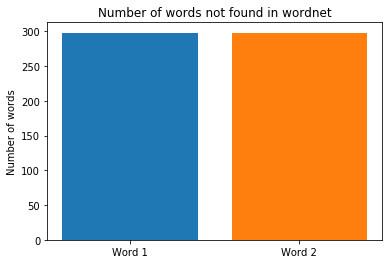

In [34]:
fig , ax = plt.subplots()

ax.bar(   'Word 1'  , len(given_data[given_data['English Word 1 AL1'] == '']) )
ax.bar(   'Word 2'  , len(given_data[given_data['English Word 2 AL1'] == '']))

# ax.legend()

plt.title('Number of words not found in wordnet')
# plt.xlabel('Number of Time words not found in wordnet')
plt.ylabel('Number of words')
plt.show()

In [35]:
print ( "Number of pairs having 0 similarity = " ,len(given_data[given_data['Jaccard A1'] == 0]))
print ( "Number of pairs having similarity except 0 = " ,len(given_data[given_data['Jaccard A1'] != 0]))

Number of pairs having 0 similarity =  994
Number of pairs having similarity except 0 =  6


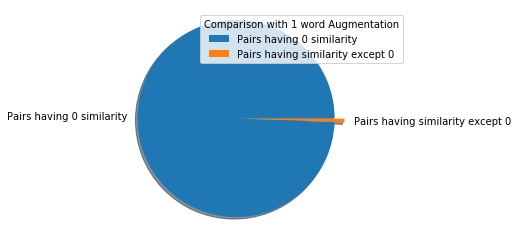

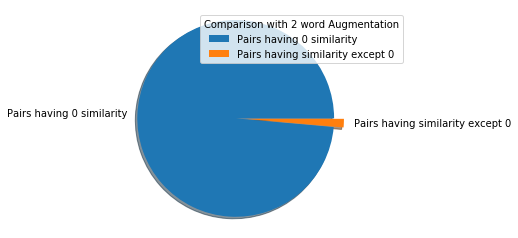

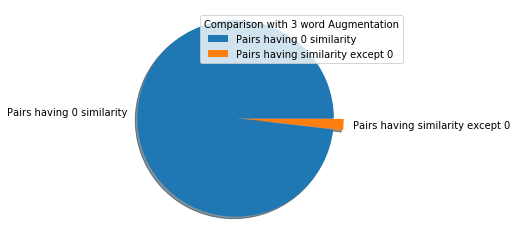

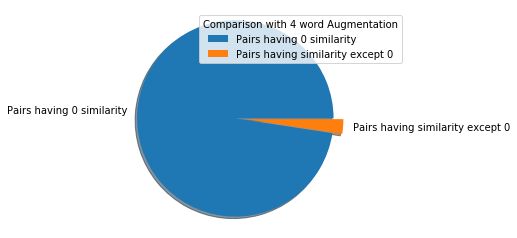

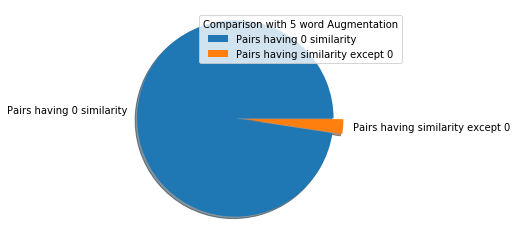

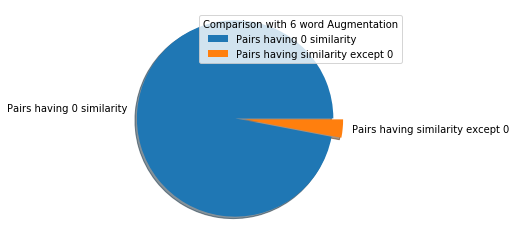

In [36]:
for i in range(1, 7):
    labels_text = ['Pairs having 0 similarity' , 'Pairs having similarity except 0']
    values = [len(given_data[given_data['Jaccard A' + str(i)] == 0]) , 
             len(given_data[given_data['Jaccard A' + str(i)] != 0])]
    explode_value = [0 , 0.1]
    plt.pie(values , explode = explode_value , labels = labels_text , shadow = True, startangle = 0 )
    plt.axis('equal')
    plt.legend(title = "Comparison with " + str(i)+ " word Augmentation")
    plt.show()

In [41]:
from scipy.stats import pearsonr
from beautifultable import BeautifulTable
from scipy.stats import spearmanr

In [38]:
table = BeautifulTable()
table.column_headers = ["Data", "Number of zero similarity", "Number of non zero similarity"]
print("Similarty using Jaccard")
for i in range(1 , 7):
    table.append_row([str(i) + " Word Augmentation",
                     len(given_data[given_data['Jaccard A' + str(i)] == 0]),
                     len(given_data[given_data['Jaccard A' + str(i)] != 0])])
print(table)

Similarty using Jaccard
+---------------------+-------------------------+------------------------------+
|        Data         | Number of zero similari | Number of non zero similarit |
|                     |           ty            |              y               |
+---------------------+-------------------------+------------------------------+
| 1 Word Augmentation |           994           |              6               |
+---------------------+-------------------------+------------------------------+
| 2 Word Augmentation |           986           |              14              |
+---------------------+-------------------------+------------------------------+
| 3 Word Augmentation |           982           |              18              |
+---------------------+-------------------------+------------------------------+
| 4 Word Augmentation |           976           |              24              |
+---------------------+-------------------------+------------------------------+
| 5 

In [39]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.101  | 0.101 |  0.101  |    0.101    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.128  | 0.144 |  0.144  |    0.144    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.158  | 0.161 |  0.163  |    0.16     |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.171  | 0.181 |  0.185  |    0.18     |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.17   | 0.179 |  0.183  |    0.179    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.174  | 0.185 |  0.192  |    0.181    |
+---------------------+---------+-------+----

In [42]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list( given_data["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Dice A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Overlap A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.105  | 0.105 |  0.105  |    0.105    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.159  | 0.159 |  0.159  |    0.159    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.162  | 0.162 |  0.162  |    0.162    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.195  | 0.195 |  0.195  |    0.195    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.194  | 0.194 |  0.194  |    0.194    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.215  | 0.215 |  0.215  |    0.215    |
+---------------------+---------+-------+---

In [47]:
given_data = pd.read_excel('dataset with similarity score after augmenting with wordnet 1_2_3_4_5.xlsx')
given_data

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,j,ballistic_capsule,0,0,0,...,0.000000,0.000000,0.0,0.0,"james_prescott_joule,j,watt_second","space_vehicle,ballistic_capsule",0.000000,0.000000,0.0,0.000000
1,1,Promised Land,باکو,0.42,Baku,NaN,capital_of_azerbaijan,0,0,0,...,0.000000,0.000000,0.0,0.0,NaN,capital_of_azerbaijan,0.000000,0.000000,0.0,0.000000
2,2,car,سائیکل,2.83,bicycle,auto,bike,0,0,0,...,0.000000,0.000000,0.0,0.0,"railroad_car,elevator_car,gondola,cable_car,ma...","bike,cycle,wheel,pedal",0.000000,0.000000,0.0,0.000000
3,3,polyhedron,اداکار,0.00,actor,NaN,histrion,0,0,0,...,0.000000,0.000000,0.0,0.0,NaN,"thespian,player,doer,histrion,role_player,worker",0.000000,0.000000,0.0,0.000000
4,4,multiple sclerosis,ایم ایس,3.92,MS,NaN,multiple_sclerosis,0,0,0,...,0.000000,0.000000,0.0,0.0,NaN,"mb,magnolia_state,m,disseminated_multiple_scle...",0.000000,0.000000,0.0,0.000000
5,5,fault,نظام,0.58,system,mistake,scheme,0,0,0,...,0.000000,0.000000,0.0,0.0,"defect,error,break,demerit,shift,mistake,fault...","scheme,organisation,arrangement,organization,s...",0.000000,0.000000,0.0,0.000000
6,6,weapon,حفاظتی ٹوپی,1.83,helmet,arm,NaN,0,0,0,...,0.000000,0.000000,0.0,0.0,"artillery,weapon_system,arm",NaN,0.000000,0.000000,0.0,0.000000
7,7,screenwriter,ٹیلی ویژن,1.67,television,film_writer,telecasting,0,0,0,...,0.000000,0.000000,0.0,0.0,film_writer,"telly,tv_set,telecasting,idiot_box,television_...",0.000000,0.000000,0.0,0.000000
8,8,United Nations,بانکی مون,2.50,Ban Ki-moon,NaN,NaN,0,0,0,...,0.000000,0.000000,0.0,0.0,NaN,NaN,0.000000,0.000000,0.0,0.000000
9,9,Si-o-seh pol,میتھمیتکل پل,3.00,Mathematical Bridge,NaN,NaN,0,0,0,...,0.000000,0.000000,0.0,0.0,NaN,NaN,0.000000,0.000000,0.0,0.000000


# Comparison

In [48]:
df_Zero =  given_data[given_data['Jaccard A6'] == 0.0]
print(df_Zero.shape)
for index, row in df_Zero.iterrows():
    print(index , "\n" ,row["English Word 1 AL6"], "=======================================" ,row["English Word 2 AL6"])

(970, 41)
0 
 james_prescott_joule,j,watt_second ======================================= space_vehicle,ballistic_capsule
1 
 nan ======================================= capital_of_azerbaijan
2 
 railroad_car,elevator_car,gondola,cable_car,machine,motorcar,railway_car,railcar,automobile,auto ======================================= bike,cycle,wheel,pedal
3 
 nan ======================================= thespian,player,doer,histrion,role_player,worker
4 
 nan ======================================= mb,magnolia_state,m,disseminated_multiple_sclerosis,mib,sm,one_thousand,k,thou,1000,mebibyte,mississippi,meter,molar_concentration,thousand,grand,manuscript,molarity,master_of_science,ms.,chiliad,megabyte,metre,msc,yard,disseminated_sclerosis,multiple_sclerosis,g
5 
 defect,error,break,demerit,shift,mistake,faulting,geological_fault,flaw,blame,fracture ======================================= scheme,organisation,arrangement,organization,system_of_rules
6 
 artillery,weapon_system,arm ============

237 
 nan ======================================= nan
238 
 nan ======================================= hurry,hurriedness,haste,downfall,hastiness
239 
 army_intelligence,bradypus_tridactylus,artificial_insemination,three-toed_sloth,artificial_intelligence ======================================= barrage,barrage_fire,assault_and_battery,bombardment,electric_battery,stamp_battery,shelling
240 
 chef-d'oeuvre ======================================= nan
241 
 criminal_offense,law-breaking,offense,criminal_offence,offence ======================================= attempt,assail,fire,plan_of_attack,lash_out,onslaught,onrush,approach,tone-beginning,snipe,assault,flack,round,aggress,blast,onset,set_on,flak
242 
 enthronization,investiture,enthronement,enthronisation ======================================= water_supply,body_of_water,pee,irrigate,urine,piddle,h2o,water_system,weewee,piss
243 
 vocalizer,vocaliser,singer ======================================= stave,faculty
244 
 nan ==============

308 
 sign_of_the_zodiac,residence,mansion_house,hall,star_sign,sign,house,planetary_house,manse ======================================= sculpturer,carver,statue_maker
309 
 ambience,aura,standard_atmosphere,air,ambiance,atmospheric_state,standard_pressure,atm ======================================= nan
310 
 cuticle,harbor,screen,carapace,buckler,shell,harbour ======================================= shield
311 
 strike,mint ======================================= defrayment,requital,defrayal
312 
 nan ======================================= area,theater_of_operations,battlefield,line_of_business,force_field,field_of_honor,subject,athletic_field,field_of_force,sphere,field_of_view,champaign,landing_field,study,subject_field,theater,bailiwick,battleground,playing_area,airfield,playing_field,field_of_operation,orbit,field_of_study,discipline,flying_field,field_of_battle,plain,domain,theatre,field_of_operations,theatre_of_operations,arena,subject_area
313 
 thelonious_monk,thelonious_sphe

382 
 condenser,capacitance,electrical_condenser ======================================= junction_rectifier,crystal_rectifier,rectifying_tube,semiconductor_diode,rectifying_valve
383 
 putrefaction,degeneracy,putridness,putrescence,corruptness,depravation,depravity,subversion,rottenness ======================================= faker,imposter,hoax,shammer,pretender,fake,put-on,sham,fraudulence,pseudo,humbug,role_player,pseud,impostor,dupery
384 
 nan ======================================= blow,nose_candy,c,coca_cola,snow
385 
 nan ======================================= nan
386 
 nan ======================================= nan
387 
 beak,snoot,schnoz,hooter,schnozzle,honker,snout,nose ======================================= liquid,unstable,runny,fluent,smooth,mobile
388 
 phonemics ======================================= riddle,silver_screen,screenland,crt_screen,shield,sort,sieve,blind,block_out,covert,screen_door,filmdom,cover,projection_screen,concealment,screen_out,test
389 
 nan ==

 performing_artist ======================================= sung,call,birdcall,vocal,birdsong,strain,song_dynasty,sung_dynasty
568 
 notebook_computer ======================================= ordnance,triggerman,gas_pedal,torpedo,shooter,accelerator_pedal,throttle,grease-gun,artillery,gunman,hired_gun,gas,accelerator,gun_for_hire,hitman,gunslinger,heavy_weapon,hit_man
569 
 iris_diaphragm,flag,fleur-de-lis,sword_lily ======================================= nan
570 
 penitentiary,playpen,indite,write,compose ======================================= rudiment,abcs,first_principle,abc,abc's,first_rudiment
571 
 isaac_merrit_singer,isaac_bashevis_singer,vocalizer,isaac_m._singer,vocaliser,vocalist ======================================= chorus_line,greek_chorus,refrain,choir
572 
 across-the-board,all-inclusive,broad,all-embracing,encompassing,panoptic,extensive,all-encompassing,mantle,cover,wide ======================================= natalie_wood,ellen_price_wood,forest,woods,sir_henry_wood,

 sportswoman,lark_about,athletics,romp,cavort,sportsman,skylark,feature,gambol,variation,mutation,boast,summercater,disport,play,lark,rollick,frisk,mutant,run_around,fun,frolic ======================================= neandertal,swinish,neandertal_man,boorish,oafish,neanderthal_man,loutish,homo_sapiens_neanderthalensis,neanderthalian
773 
 b._b._king,queen,magnate,big_businessman,tycoon,billie_jean_moffitt_king,martin_luther_king,top_executive,power,billie_jean_king,rex,mogul,riley_b_king,baron,business_leader,martin_luther_king_jr.,world-beater,male_monarch ======================================= nan
774 
 someone,somebody,soul,individual,mortal ======================================= fictional_character,theatrical_role,persona,fibre,reference,grapheme,graphic_symbol,fictitious_character,character_reference,quality,fiber,lineament,role,eccentric,type,case,part
775 
 railroad_car,elevator_car,gondola,cable_car,machine,motorcar,railway_car,railcar,automobile,auto ========================

 nan ======================================= behavioristic_psychology,behaviorism,behaviouristic_psychology
954 
 united_states_constitution,constitution_of_the_united_states,composition,us_constitution,formation,u.s._constitution,make-up,old_ironsides,organisation,makeup,fundamental_law,organization,organic_law,establishment,physical_composition ======================================= emperor_moth,saturnia_pavonia,emperor_butterfly
955 
 evince,present,exhibit,demo,indicate,designate,shew,point,picture,depict,bear_witness,read,appearance,evidence,show_up,testify,usher,register,prove,demonstrate,display,render,establish,express,record ======================================= nan
957 
 nan ======================================= nan
958 
 citrus_paradisi ======================================= nan
959 
 nan ======================================= nan
960 
 emotional_state,tone,sprightliness,inspirit,smell,intent,flavor,flavour,feeling,disembodied_spirit,purport,liveliness,life,heart,spir

# Target only non empty sets

In [49]:
df_noNan =  given_data[given_data['English Word 1 AL6'].notnull()]
df_noNan.shape

(702, 41)

In [50]:
df_noNan =  df_noNan[df_noNan['English Word 2 AL6'].notnull()]
df_noNan.shape

(522, 41)

In [51]:
df_noNan

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,j,ballistic_capsule,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"james_prescott_joule,j,watt_second","space_vehicle,ballistic_capsule",0.000000,0.000000,0.000000,0.000000
2,2,car,سائیکل,2.83,bicycle,auto,bike,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"railroad_car,elevator_car,gondola,cable_car,ma...","bike,cycle,wheel,pedal",0.000000,0.000000,0.000000,0.000000
5,5,fault,نظام,0.58,system,mistake,scheme,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"defect,error,break,demerit,shift,mistake,fault...","scheme,organisation,arrangement,organization,s...",0.000000,0.000000,0.000000,0.000000
7,7,screenwriter,ٹیلی ویژن,1.67,television,film_writer,telecasting,0,0,0,...,0.000000,0.000000,0.000000,0.000000,film_writer,"telly,tv_set,telecasting,idiot_box,television_...",0.000000,0.000000,0.000000,0.000000
10,10,basilica,شیش محل,1.50,mosaic,roman_basilica,arial_mosaic,0,0,0,...,0.000000,0.000000,0.000000,0.000000,roman_basilica,"photomosaic,arial_mosaic",0.000000,0.000000,0.000000,0.000000
14,14,tuberculosis,ایل ای ڈی,0.00,LED,tb,light-emitting_diode,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"t.b.,tb","run,head,top,precede,pass,conduct,chair,extend...",0.000000,0.000000,0.000000,0.000000
16,16,apocalypse,آگ,1.25,fire,revelation,firing,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"revelation_of_saint_john_the_divine,book_of_re...","give_notice,can,elicit,displace,enkindle,ferve...",0.000000,0.000000,0.000000,0.000000
17,17,speed,ڈاک,0.25,post,velocity,station,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"speeding,f_number,zip,hie,rush,belt_along,amph...","emily_price_post,military_post,mail,send,posit...",0.000000,0.000000,0.000000,0.000000
19,19,laptop,بیاض,4.00,notebook,laptop_computer,notebook_computer,0,0,0,...,0.000000,0.000000,0.000000,0.000000,laptop_computer,notebook_computer,0.000000,0.000000,0.000000,0.000000
22,22,pointer,پھسلنا,1.33,slide,arrow,microscope_slide,0,0,0,...,0.000000,0.000000,0.000000,0.000000,"cursor,spanish_pointer,arrow","sloping_trough,slew,glide,lantern_slide,slidew...",0.000000,0.000000,0.000000,0.000000


In [52]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list( (df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list( (df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list( (df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list( (df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.141  | 0.141 |  0.141  |    0.141    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.181  | 0.202 |  0.202  |    0.202    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.224  | 0.227 |  0.23   |    0.227    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.241  | 0.256 |  0.262  |    0.255    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.24   | 0.254 |  0.26   |    0.253    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.246  | 0.262 |  0.272  |    0.256    |
+---------------------+---------+-------+----

In [53]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.148  | 0.148 |  0.148  |    0.148    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.224  | 0.224 |  0.224  |    0.224    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.23   | 0.23  |  0.23   |    0.23     |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.277  | 0.277 |  0.277  |    0.276    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.276  | 0.276 |  0.276  |    0.276    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.307  | 0.307 |  0.307  |    0.306    |
+---------------------+---------+-------+---